# Olympics Medals Analysis
## Overview - This script analyzes the Olympic 2008 medalist dataset. It performs data cleaning, transformation, and visualization to explore medal distributions by sport and gender.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
## Attempt to load the dataset and handle errors if the file is not found

In [95]:
# Load dataset with error handling
file_path = "olympics_08_medalists.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
    exit()

Dataset loaded successfully.


# Initial Data Inspection
## Display the first few rows of the dataset and show its structure

In [96]:
# Initial Data Inspection
print("Initial Data Preview:")
print(df.head())
print("\nData Information:")
print(df.info())

Initial Data Preview:
       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN             

# Data Cleaning and Transformation
## Reshape the dataset using melt() to transform it into a long format

In [97]:
# Reshape the dataset using melt()
df_melted = df.melt(id_vars=["medalist_name"], var_name="event", value_name="medal")

# Drop missing values
df_melted = df_melted.dropna().reset_index(drop=True)

# Extract 'gender' and 'sport' from 'event'
df_melted[['gender', 'sport']] = df_melted['event'].str.split('_', n=1, expand=True)

# Clean 'sport' column
df_melted['sport'] = df_melted['sport'].str.replace('_', ' ')

# Drop original 'event' column
df_melted = df_melted.drop(columns=['event'])

# Display cleaned data
print("Cleaned Data Preview:")
print(df_melted.head())

Cleaned Data Preview:
    medalist_name   medal gender    sport
0    Bair Badënov  bronze   male  archery
1   Ilario Di Buò  silver   male  archery
2    Im Dong-hyun    gold   male  archery
3       Jiang Lin  bronze   male  archery
4  Lee Chang-hwan    gold   male  archery


# Data Visualization
## Medal Count by Sport
### Create a bar plot to visualize the number of medals awarded per sport

/var/folders/2h/x6my6y954f9gsv339dkrqd240000gn/T/ipykernel_17534/583510608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_melted, y='sport', order=df_melted['sport'].value_counts().index, palette="coolwarm")


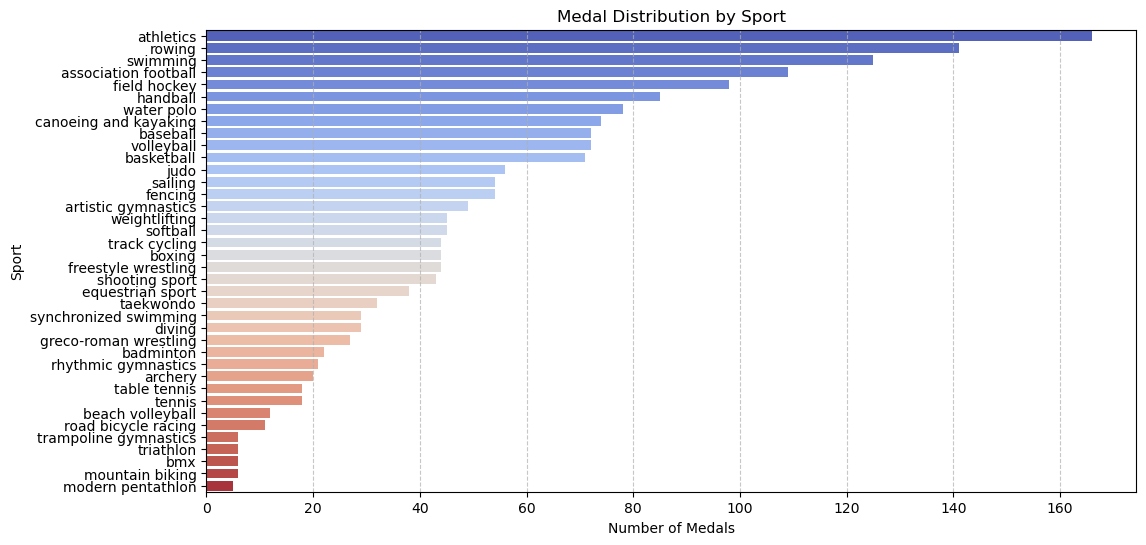

In [98]:
# Visualization 1: Medal count by sport
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, y='sport', order=df_melted['sport'].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.title("Medal Distribution by Sport")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Medal Count by Gender
## Create a bar plot to compare the number of medals awarded to male and female athletes

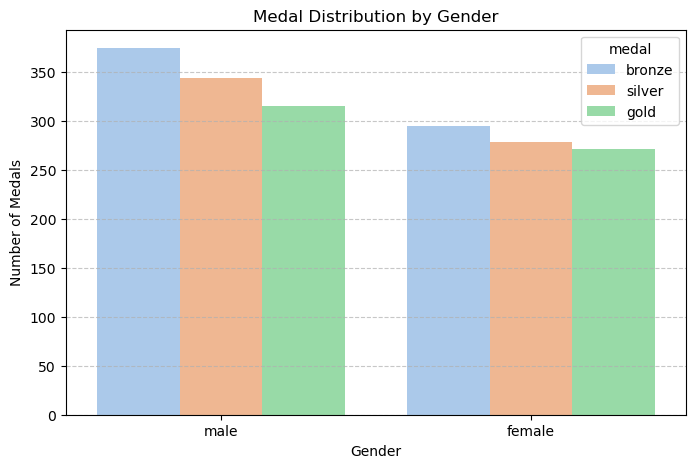

In [99]:
# Visualization 2: Medal count by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df_melted, x='gender', hue='medal', palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Number of Medals")
plt.title("Medal Distribution by Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary Statistics
## Generate a pivot table to display medal counts per sport

In [100]:
# Pivot table: Count of medals per sport
df_pivot = df_melted.pivot_table(index='sport', columns='medal', aggfunc='size', fill_value=0)
print("Pivot Table:")
print(df_pivot.head())

Pivot Table:
medal                 bronze  gold  silver
sport                                     
archery                    8     5       7
artistic gymnastics       19    14      16
association football      36    37      36
athletics                 55    52      59
badminton                  7     7       8


# Save Cleaned Dataset
## Export the cleaned dataset to a new CSV file

In [101]:
# Save cleaned dataset
df_melted.to_csv("cleaned_olympics_medalists.csv", index=False)

print("Data cleaning and visualization complete. Cleaned dataset saved.")

Data cleaning and visualization complete. Cleaned dataset saved.
